## Letters Classification in Python

In [2]:
#import libraries
import time

import numpy as np
import pandas as pd
from ggplot import *
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import random as random

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

C:\Users\Matt\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Matt\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Matt\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
#read in the data
# data = pd.read_csv('https://mheaton.byu.edu/Courses/Stat536/Case%20Studies/LetterRecognition/Data/letter-recognition.txt')
data = pd.read_csv('../letters.txt')
data.head()


,letter,xbox,ybox,width,high,pix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xege,xegevy,yege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [3]:
#print(data.describe())

In [4]:
#data.info()

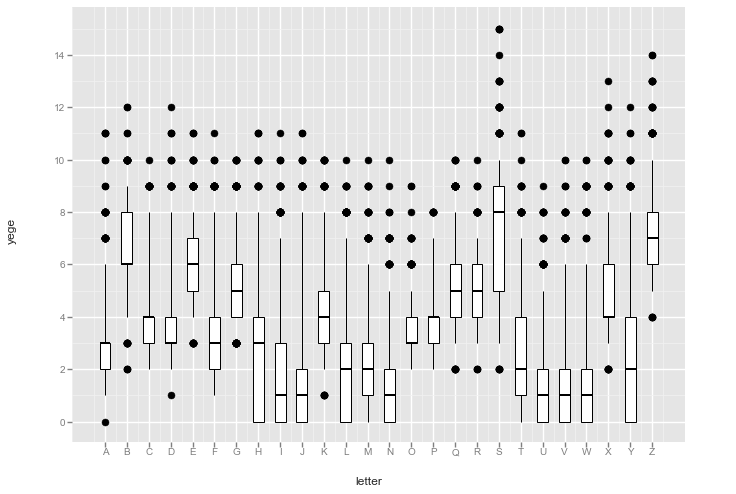

<ggplot: (-9223371915470121002)>

In [5]:
ggplot(aes(x='letter', y='yege'),data=data)+geom_boxplot()

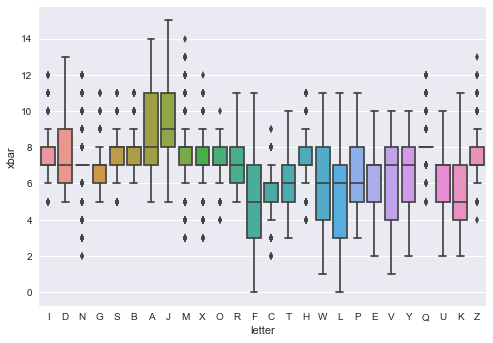

In [6]:
#quick summary statistics and plots
# letters.boxplot('letter',by='xbox')
# plt.show()

sns.boxplot(y='xbar',x='letter',data=data)
plt.show()
# sns.boxplot(y='x2bar',x='letter',data=data)
# plt.show()
# sns.despine()


In [7]:
# list(data.columns)

In [8]:
 #sns.pairplot(data)

In [7]:
#make test and train set for model
X = data.drop('letter',axis=1)
# X.head()
y = data.letter

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=123)


In [8]:
#fit the model
def my_model_train(model,X_tr,y_tr,X_tst,y_tst):
    train_start = time.time()
    model.fit(X_tr,y_tr)
    train_end = time.time()
    print('Training time:', train_end-train_start)
#     benchmark = sum(y)/len(y) #should work if y is a vector of 0s and 1s
    score = model.score(X_tst, y_tst)
    print('Score:',score)  
#     print('Benchmark:',  benchmark,'\n')

In [9]:
#different models
mod_RF = RandomForestClassifier(n_estimators=1000, max_features=5)
mod_SVM = SVC()


In [12]:
my_model_train(mod_RF,X_train,y_train,X_test,y_test)

Training time: 41.774861097335815
Score: 0.9696


In [10]:
my_model_train(mod_SVM,X_train,y_train,X_test,y_test)

Training time: 8.660697937011719
Score: 0.9712


In [11]:
##Parameters to tune random forest
numTrees=[10, 100, 1000, 2000]
maxParms=[3,5,7,10]
criterion=['gini', 'entropy']


param_dict = dict(n_estimators=numTrees, max_features=maxParms, criterion=criterion)
model=mod_RF

#grid=GridSearchCV(cv=None, estimator=model, param_grid=param_dict)
start = time.time()
#grid.fit(X,y)
end = time.time()
runtime = end-start
print('Minutes:',runtime/60)

Out of the box, it appears that SVM is better. Let's do a grid search of parameters to optimize this model.

In [12]:
#parameters to tune
k_list = ['rbf','linear']#,'poly']#,'sigmoid']#,'precomputed']
gam_list = ['auto',0.01,0.1,.5]#,1,10]
# c_list = [8,9,10,11,12,13]#,10,50]
c_list = [1,5,11]#,10,50]

# deg_list = [1,2,3,4]#,5]

#all together
param_dict = dict(kernel=k_list,gamma=gam_list,C = c_list)#,degree=deg_list) 


#model
model = mod_SVM
# model = mod_RF

grid = GridSearchCV(cv=2,estimator=model, param_grid=param_dict)
start = time.time()
grid.fit(X,y)
end = time.time()
runtime = end-start
print('Minutes:',runtime/60)

Minutes: 11.069705843925476


In [13]:

print("Best Score:",grid.best_score_)
# print("Kernel:",grid.best_estimator_.kernel)
# print("Gamma:",grid.best_estimator_.gamma)
# print("C:",grid.best_estimator_.C)
print('Best Params:',grid.best_params_)


Best Score: 0.9659982999149958
Best Params: {'C': 11, 'gamma': 'auto', 'kernel': 'rbf'}


In [14]:
temp_mod = SVC(gamma='auto',C=11,kernel='rbf')
my_model_train(temp_mod,X_train,y_train,X_test,y_test)

Training time: 9.052967548370361
Score: 0.9786


In [ ]:
#notes of best models
# Best Score: 0.9742987149357468
# Best Params: {'gamma': 'auto', 'kernel': 'rbf', 'C': 5}

In [22]:
# make a confusion matrix and plot it (if possible)
from sklearn.metrics import confusion_matrix
import itertools


In [23]:
data['rand']=np.random.choice([1, 2, 3, 4, 5],  19999) 
data.loc[:,'pred']="A"
data.head

<bound method NDFrame.head of       letter  xbox  ybox  width  high  pix  xbar  ybar  x2bar  y2bar  xybar  \
0          I     5    12      3     7    2    10     5      5      4     13   
1          D     4    11      6     8    6    10     6      2      6     10   
2          N     7    11      6     6    3     5     9      4      6      4   
3          G     2     1      3     1    1     8     6      6      6      6   
4          S     4    11      5     8    3     8     8      6      9      5   
5          B     4     2      5     4    4     8     7      6      6      7   
6          A     1     1      3     2    1     8     2      2      2      8   
7          J     2     2      4     4    2    10     6      2      6     12   
8          M    11    15     13     9    7    13     2      6      2     12   
9          X     3     9      5     7    4     8     7      3      8      5   
10         O     6    13      4     7    4     6     7      6      3     10   
11         G     4    

Run 5-fold cross validation

In [24]:
#best model

for i in range(1,6):
    print(i)
    X_test=data.loc[data.rand==i, 'xbox':'yegvx']   #X_tr.head
    X_train=data.loc[data.rand!=i, 'xbox':'yegvx']
    y_train=data.loc[data.rand!=i, 'letter']
    y_test = data.loc[data.rand==i, 'letter']
    model_best = SVC(gamma = 'auto', kernel = 'rbf', C = 11)
    my_model_train(model_best,X_tr=X_train,y_tr=y_train,X_tst=X_test,y_tst=y_test)
    y_pred = model_best.predict(X_test)
    data.loc[data.rand==i, 'pred']=y_pred
#compute matrix
#y_pred = model_best.predict(X_test)
#cnf_matrix = confusion_matrix(y_test,y_pred)

# print(y_pred)
# print(y_test)
# print(np.sum(y_pred == y_test))
# print(cnf_matrix)

1
Training time: 10.085658311843872
Score: 0.9773767158108795
2
Training time: 10.487176179885864
Score: 0.9715293524817334
3
Training time: 10.005078315734863
Score: 0.9792848335388409
4
Training time: 9.942544937133789
Score: 0.976720901126408
5
Training time: 10.077542304992676
Score: 0.9794859120118635


In [25]:
data=data.sort_values(by="letter")
cnf_matrix = confusion_matrix(data.loc[:,'letter'],data.loc[:,'pred'])


In [26]:
print(np.mean(data.letter==data.pred)) #overall accuracy
letters=list(string.ascii_uppercase)
pd.DataFrame({"Letter":letters, "Accuracy":np.diag(cnf_matrix)/np.sum(cnf_matrix, axis=1)}).sort_values(by="Accuracy", ascending=False) ##Accuracy by letter

0.9768988449422471


,Accuracy,Letter
0,0.996198,A
22,0.993351,W
18,0.993316,S
20,0.991390,U
12,0.991162,M
25,0.990463,Z
16,0.988506,Q
23,0.986023,X
24,0.986005,Y
19,0.984906,T


In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


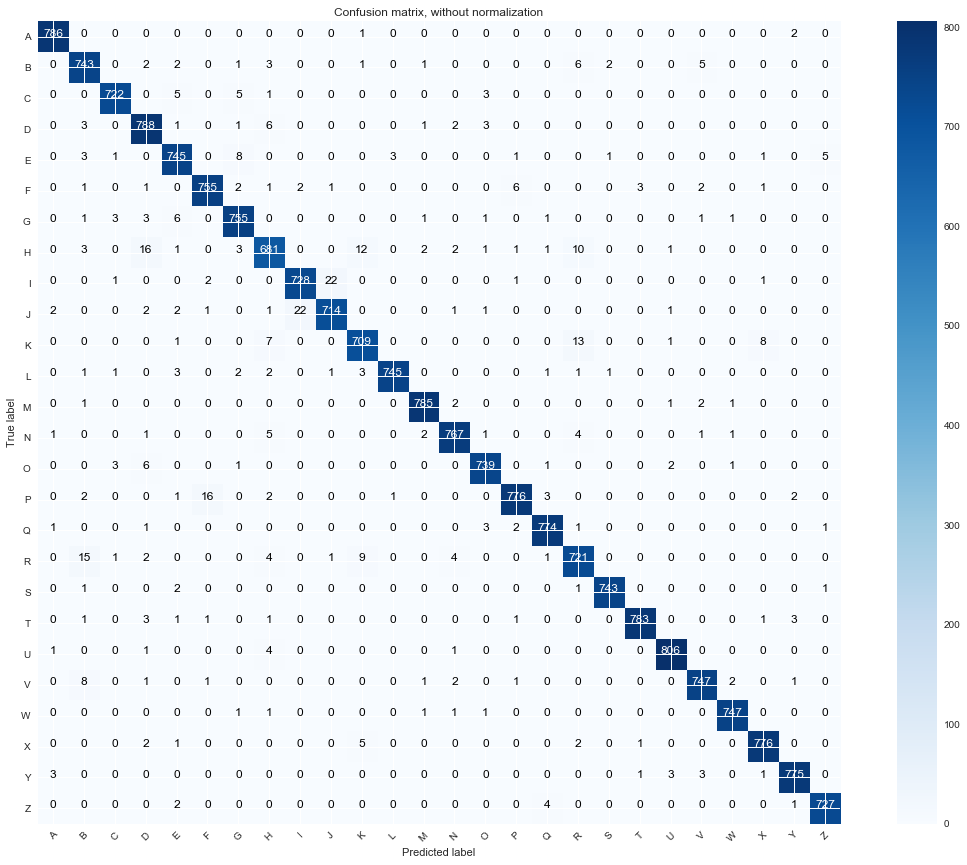

In [28]:
#plot non_normalized confusion Matrix
# class_names = ['Bad','Good']
import string
class_names = list(string.ascii_uppercase)

plt.figure(figsize=(16, 12))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# plt.savefig('../overleaf/confmatrix.png')
plt.show()

In [ ]:
# list(range(1,27))

In [ ]:
# list(string.ascii_lowercase)

### Make an example visualization of an SVM
- split off the letters a,b,c, and d and classify those with xbar and ybar

In [ ]:
#make modified dataset
# mini_dat = data
# print(data.head(5))
# data.iloc[0,0:3]
mini_data = data[data['letter'].isin(['A','B','C'])][['letter','xbar','ybar']]#,['letter','xbar','ybar']]
# mini_data = mini_data[['letter','xbar','ybar']]
mini_data.head()

In [ ]:
mini_data.info()
mini_data.letter.describe()

In [ ]:
#plot the decision region
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx = None, resolution = 0.02):
    #setup marker generator and color map
    markers = ['s','x','o','v','^']
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max = X[:,0].min() - 1, X[:,0].max() + 1 #sepal length
    x2_min,x2_max = X[:,1].min() - 1, X[:,1].max() + 1 #petal length
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha = 0.4,cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl,0],y = X[y==cl,1],alpha = 0.8,c=cmap(idx),marker = markers[idx],label = cl)
      

In [ ]:
#set up a mini svm for visualization
predictors = mini_data.drop('letter',axis=1)
temp = mini_data.letter
empt = []
# print(temp)
for i in temp:
#     
    if i == 'A':
        i = 0
    elif i == 'B':
        i = 1
    else: 
        i = 2
    empt.append(i)    
target = empt
target[:20]

In [ ]:
#mini model
p1,p2,t1,t2 = train_test_split(predictors,target,test_size=0.25, random_state=123)
my_model_train(mod_SVM,p1,t1,p2,t2)
mini_mod = SVC().fit(predictors,target)

In [ ]:
# plot_decision_regions(X = np.array(predictors), y = np.array(target), classifier=model_best)
plot_decision_regions(X = np.array(predictors), y = np.array(target), classifier=mini_mod)
plt.xlabel('xbar')
plt.ylabel('ybar')
plt.legend( loc = 'upper right')
L=plt.legend()
L.get_texts()[0].set_text('A')
L.get_texts()[1].set_text('B')
L.get_texts()[2].set_text('C')
plt.savefig('DemoSVM.pdf')

plt.show()



In [29]:
cnf_matrix

array([[786,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0, 743,   0,   2,   2,   0,   1,   3,   0,   0,   1,   0,   1,
          0,   0,   0,   0,   6,   2,   0,   0,   5,   0,   0,   0,   0],
       [  0,   0, 722,   0,   5,   0,   5,   1,   0,   0,   0,   0,   0,
          0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3,   0, 788,   1,   0,   1,   6,   0,   0,   0,   0,   1,
          2,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3,   1,   0, 745,   0,   8,   0,   0,   0,   0,   3,   0,
          0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   1,   0,   5],
       [  0,   1,   0,   1,   0, 755,   2,   1,   2,   1,   0,   0,   0,
          0,   0,   6,   0,   0,   0,   3,   0,   2,   0,   1,   0,   0],
       [  0,   1,   3,   3,   6,   0, 755,   0,   0,   0,   0,   0,   1,
          0,   1,   0,   1,   0,   0,   0,   